### <centre>IBM Data Science Professional Certificate</centre>
#### <centre>Capstone Project</centre>
## <centre>Rent and House Prices in Auckland</centre>
##### <centre>Asha Rajagopal</centre>

In [2]:
# import the required libraries for our analysis
import pandas as pd
import numpy as np

!pip install beautifulsoup4 # for webscraping
from bs4 import BeautifulSoup

import requests # for sending requests

!pip install lxml

     |████████████████████████████████| 122kB 6.3MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 5.7MB/s eta 0:00:01


### 1. Data Wrangling and Cleaning

In [4]:
# scrape the webpage
webpage = requests.get("https://www.barfoot.co.nz/market-reports/2020/january/suburb-report")
htmlContent = BeautifulSoup(webpage.content,"html.parser")
tables = htmlContent.find_all('table')

# get the data from tables and convert them to dataframe
CentralAuckland = pd.DataFrame(pd.read_html(str(tables[1]))[0])
CentralSuburb = pd.DataFrame(pd.read_html(str(tables[2]))[0])
EasternSuburb = pd.DataFrame(pd.read_html(str(tables[3]))[0])
FranklinSuburb = pd.DataFrame(pd.read_html(str(tables[4]))[0])
NorthshoreSuburb = pd.DataFrame(pd.read_html(str(tables[5]))[0])
PakurangaSuburb = pd.DataFrame(pd.read_html(str(tables[6]))[0])
RodneySuburb = pd.DataFrame(pd.read_html(str(tables[7]))[0])
SouthSuburb = pd.DataFrame(pd.read_html(str(tables[8]))[0])
WestSuburb = pd.DataFrame(pd.read_html(str(tables[9]))[0])

#randomly check the dataframes
print(CentralAuckland)
print(WestSuburb)

             Suburb Average sale price (3 bdrm)  \
0  Auckland Central                    $987,500   

  Average rent per week (3 bdrm) Gross yield  
0                         $1,055       5.58%  
                Suburb Average sale price (3 bdrm)  \
0            Glen Eden                    $712,796   
1             Glendene                    $746,100   
2            Henderson                    $773,894   
3          Hobsonville                    $933,889   
4              Kelston                    $753,000   
5            Laingholm                    $836,588   
6               Massey                    $750,296   
7             New Lynn                    $796,933   
8                Ranui                    $654,769   
9            Sunnyvale                    $679,786   
10             Swanson                    $742,000   
11  Te Atatu Peninsula                    $850,048   
12      Te Atatu South                    $773,619   
13           Titirangi                    $909,

In [5]:
# add Area column to each table
CentralAuckland['Area'] = 'Auckland Central'
CentralSuburb['Area'] = 'Central'
EasternSuburb['Area'] = 'Eastern'
FranklinSuburb['Area'] = 'Franklin/Manukau Rural'
NorthshoreSuburb['Area'] = 'North Shore'
PakurangaSuburb['Area'] = 'Pakuranga/ Howick'
RodneySuburb['Area'] = 'Rodney'
SouthSuburb['Area'] = 'Southern'
WestSuburb['Area'] = 'Western'

# print and check
CentralSuburb

,Suburb,Average sale price (3 bdrm),Average rent per week (3 bdrm),Gross yield,Area
0,Avondale,"$855,105",$554,3.39%,Central
1,Blockhouse Bay,"$930,663",$563,3.16%,Central
2,Epsom,"$1,601,250",$773,2.52%,Central
3,Freemans Bay,"$1,702,167",$881,2.70%,Central
4,Greenlane,"$1,516,077",$672,2.32%,Central
5,Grey Lynn,"$1,562,308",$805,2.69%,Central
6,Hillsborough,"$940,923",$589,3.27%,Central
7,Lynfield,"$821,800",$570,3.63%,Central
8,Mt Albert,"$991,073",$612,3.23%,Central
9,Mt Eden,"$1,506,133",$736,2.55%,Central


In [10]:
# combine the different dataframes to a single dataframe
dataframes = [CentralAuckland,CentralSuburb,EasternSuburb,FranklinSuburb,NorthshoreSuburb,PakurangaSuburb,RodneySuburb,SouthSuburb,WestSuburb]
auckland_df = pd.concat(dataframes)

# move 'Area' as first column
auckland_df = auckland_df[[auckland_df.columns[-1]] + list(auckland_df.columns[:-1])]
auckland_df.head()

,Area,Suburb,Average sale price (3 bdrm),Average rent per week (3 bdrm),Gross yield
0,Auckland Central,Auckland Central,"$987,500","$1,055",5.58%
0,Central,Avondale,"$855,105",$554,3.39%
1,Central,Blockhouse Bay,"$930,663",$563,3.16%
2,Central,Epsom,"$1,601,250",$773,2.52%
3,Central,Freemans Bay,"$1,702,167",$881,2.70%


In [14]:
# drop the 'gross yield' column
auckland_df.drop(['Gross yield'], inplace=True)
auckland_df.reset_index(drop=True,inplace=True)
auckland_df.head()

,Area,Suburb,Average sale price (3 bdrm),Average rent per week (3 bdrm)
0,Auckland Central,Auckland Central,"$987,500","$1,055"
1,Central,Avondale,"$855,105",$554
2,Central,Blockhouse Bay,"$930,663",$563
3,Central,Epsom,"$1,601,250",$773
4,Central,Freemans Bay,"$1,702,167",$881


In [31]:
#print datatypes
print(auckland_df.dtypes)
# rename columns
auckland_df.rename(columns=lambda x: x.split('(')[0].strip(),inplace=True)
auckland_df.head()

Area                     object
Suburb                   object
Average sale price       object
Average rent per week    object
dtype: object


,Area,Suburb,Average sale price,Average rent per week
0,Auckland Central,Auckland Central,"$987,500","$1,055"
1,Central,Avondale,"$855,105",$554
2,Central,Blockhouse Bay,"$930,663",$563
3,Central,Epsom,"$1,601,250",$773
4,Central,Freemans Bay,"$1,702,167",$881


In [43]:
auckland_df.to_csv('auckland_data')

,Area,Suburb,Average sale price,Average rent per week
0,Auckland Central,Auckland Central,"$987,500","$1,055"
1,Central,Avondale,"$855,105",$554
2,Central,Blockhouse Bay,"$930,663",$563
3,Central,Epsom,"$1,601,250",$773
4,Central,Freemans Bay,"$1,702,167",$881


In [11]:
import pandas as pd

auckland_df = pd.DataFrame(pd.read_csv('auckland_data',index_col=0))
# strip $ and , from column values
auckland_df['Average sale price'] = auckland_df['Average sale price'].apply(lambda x: x.replace('$','').replace(',',''))
auckland_df['Average rent per week'] = auckland_df['Average rent per week'].apply(lambda x: x.replace('$','').replace(',',''))

# convert datatype to int
auckland_df['Average sale price'] = pd.to_numeric(auckland_df['Average sale price'])
auckland_df['Average rent per week'] = pd.to_numeric(auckland_df['Average rent per week'])

print(auckland_df.dtypes)
auckland_df.head()

Area                     object
Suburb                   object
Average sale price        int64
Average rent per week     int64
dtype: object


,Area,Suburb,Average sale price,Average rent per week
0,Auckland Central,Auckland Central,987500,1055
1,Central,Avondale,855105,554
2,Central,Blockhouse Bay,930663,563
3,Central,Epsom,1601250,773
4,Central,Freemans Bay,1702167,881


In [12]:
# Visualize the trend of Sale price and Rent/week for the suburbs
import matplotlib.pyplot as plt
%matplotlib inline

# normalise the columns and then group them
temp_df = auckland_df.copy()
temp_df['Average sale price'] = (temp_df['Average sale price'] - temp_df['Average sale price'].min())/(temp_df['Average sale price'].max()-temp_df['Average sale price'].min())
temp_df['Average rent per week'] = (temp_df['Average rent per week'] - temp_df['Average rent per week'].min())/(temp_df['Average rent per week'].max()-temp_df['Average rent per week'].min())
grouped_df = temp_df.groupby(['Area']).mean()
grouped_df

,Average sale price,Average rent per week
Area,,
Auckland Central,0.278598,1.000000
Central,0.433825,0.387338
Eastern,0.439064,0.419351
Franklin/Manukau Rural,0.104019,0.058292
North Shore,0.337232,0.302017
Pakuranga/ Howick,0.280546,0.239920
Rodney,0.172984,0.209242
Southern,0.070029,0.124111
Western,0.148674,0.157198


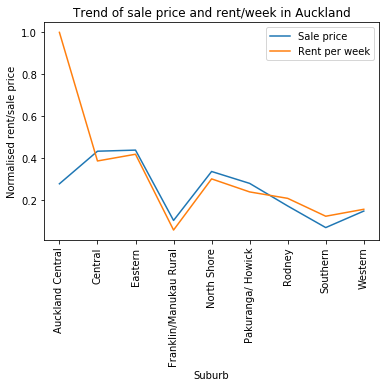

In [13]:
# plot the chart
plt.plot(temp_df['Area'].unique(),grouped_df['Average sale price'], label='Sale price')
plt.plot(temp_df['Area'].unique(),grouped_df['Average rent per week'], label='Rent per week')

plt.xlabel("Suburb")
plt.ylabel("Normalised rent/sale price")
plt.xticks(temp_df['Area'].unique(), temp_df['Area'].unique(), rotation='vertical')
plt.title("Trend of sale price and rent/week in Auckland")
plt.legend()
plt.show()

#### Add latitude and longitude information to the dataframe

In [20]:
# import the required libraries
!pip install geocoder
import geocoder # import geocoder

latlong = []
for suburb in auckland_df['Suburb']:
    g = geocoder.arcgis('{}, Auckland, New Zealand'.format(suburb))        
    latlong.append(g.latlng)
latlong

[[-36.84839904099994, 174.76438785300002],
 [-36.89044821899995, 174.6870174820001],
 [-36.92819999999995, 174.70019000000002],
 [-36.88845407399998, 174.77293816600002],
 [-36.85287929799995, 174.75035326400007],
 [-36.89491322499998, 174.79262520600003],
 [-36.861568621999936, 174.73955514300008],
 [-36.92389779599995, 174.75536291900005],
 [-36.93035918099997, 174.71985815800008],
 [-36.884724379999966, 174.71769494000011],
 [-36.88360167999997, 174.7542374830001],
 [-36.916066143999956, 174.73653593900008],
 [-36.90530967299998, 174.71278691300006],
 [-36.92059910099994, 174.79065501900004],
 [-36.85073268799994, 174.73922326900004],
 [-36.91065336899993, 174.77232995700012],
 [-36.887782372999936, 174.7366463080001],
 [-36.90823275499997, 174.75722268900006],
 [-37.568209999999965, 175.14020000000005],
 [-36.896377420999954, 174.81373710200012],
 [-36.87394120099998, 174.86095625600012],
 [-36.86036095299994, 174.87265930000012],
 [-36.86950058399998, 174.82957281000006],
 [-36.83

In [25]:
# convert latlong to a dataframe and attach to auckland dataframe
latlong = pd.DataFrame(latlong)
auckland_df['Latitude'] = latlong[0]
auckland_df['Longitude'] = latlong[1]
auckland_df.head()

,Area,Suburb,Average sale price,Average rent per week,Latitude,Longitude
0,Auckland Central,Auckland Central,987500,1055,-36.848399,174.764388
1,Central,Avondale,855105,554,-36.890448,174.687017
2,Central,Blockhouse Bay,930663,563,-36.928200,174.700190
3,Central,Epsom,1601250,773,-36.888454,174.772938
4,Central,Freemans Bay,1702167,881,-36.852879,174.750353


In [26]:
# save the result to csv file
auckland_df.to_csv('auckland_datalatlong')

### 2. Data Analysis and Visualization

In [13]:
# retrieve our data
auckland_data = pd.DataFrame(pd.read_csv('auckland_datalatlong',index_col=0))

# import required libraries
import folium
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

address= "Auckland, New Zealand"
geolocator = Nominatim(user_agent="auckland_explr")
location = geolocator.geocode(address)
print("Latitude and longitude of Auckland are {},{}".format(location.latitude,location.longitude))

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

#### Visualize Auckland and suburbs on map

In [4]:
# create map of Auckland
auckland_map = folium.Map(location=[location.latitude,location.longitude],zoom_start=9)

# add suburbs to the map using markers
for lat, lng, suburb in zip(auckland_data['Latitude'],auckland_data['Longitude'],auckland_data['Suburb']):
    label = folium.Popup(suburb,parse_html=True)
    folium.CircleMarker( [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(auckland_map)

auckland_map

Now that we have visualized the Auckland region, lets get the top venues in each suburb using FourSquare API

In [35]:
# Foursquare API credentials
CLIENT_ID = 'NWRHXKICOC2RPWPQASNY0PTQX3FXEUSX0YXLCKWNWNMT3AUA' # Foursquare ID
CLIENT_SECRET = '4FAUJ4X1Y4PHIN4QHUA5FII223RJ2GMO0UCQBOYXSS31RTBY' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [49]:
import requests
#check result for a single suburb to see the result structure
suburb_latitude = auckland_data.loc[0, 'Latitude'] # suburb latitude value
suburb_longitude = auckland_data.loc[0, 'Longitude'] # suburb longitude value

suburb_name = auckland_data.loc[0, 'Suburb'] # suburb name
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, suburb_latitude, suburb_longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ecdb02677af03001ba1d1c4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Business District',
  'headerFullLocation': 'Central Business District, Auckland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 141,
  'suggestedBounds': {'ne': {'lat': -36.843899036499934,
    'lng': 174.77000077692398},
   'sw': {'lat': -36.85289904549994, 'lng': 174.75877492907605}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e483e8f1850c7ee212e3655',
       'name': 'Depot Eatery',
       'location': {'address': '86 Federal St',
        'lat': -36.848890296850634,
        'lng': 174.76231058437375,
        'labeledLatLngs': [{'label':

Since we got the result structure to work upon, lets proceed with retrieving venues for each suburb

In [62]:
# define a function to pull the result and create a new dataframe consisting of suburb and top 10 venue for each suburb
import json

def getNearbyVenues(dataframe,radius=1500):
    #initialise an empty array
    venues_list = []
    for suburb,lat,lng in zip(dataframe['Suburb'],dataframe['Latitude'],dataframe['Longitude']):
        print(suburb)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            suburb, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [63]:
LIMIT = 100
auckland_venues = getNearbyVenues(dataframe=auckland_data[['Suburb','Latitude','Longitude']])

Auckland Central
Avondale
Blockhouse Bay
Epsom
Freemans Bay
Greenlane
Grey Lynn
Hillsborough
Lynfield
Mt Albert
Mt Eden
Mt Roskill
New Windsor
Onehunga
Ponsonby
Royal Oak
Sandringham
Three Kings
Westmere
Ellerslie
Glen Innes
Glendowie
Meadowbank
Mission Bay
Mt Wellington
Orakei
Panmure
Parnell
Pt England
Remuera
St Heliers
St Johns
Pokeno
Pukekohe
Tuakau
Waiuku
Albany
Beach Haven
Birkdale
Birkenhead
Browns Bay
Devonport
Forrest Hill
Glenfield
Mairangi Bay
Milford
Murray's Bay
Sunnynook
Takapuna
Torbay
Beachlands
Bucklands Beach
Dannemora
Half Moon Bay
Highland Park
Howick
Mellons Bay
Northpark
Pakuranga
Gulf Harbour
Manly
Orewa
Red Beach
Silverdale - Whangaparaoa
Stanmore Bay
Warkworth
Clendon Park
Conifer Grove
Flat Bush
Mangere
Manurewa
Otahuhu
Otara
Papakura
Papatoetoe
Takanini
Wattle Downs
Weymouth
Glen Eden
Glendene
Henderson
Hobsonville
Kelston
Laingholm
Massey
New Lynn
Ranui
Sunnyvale
Swanson
Te Atatu Peninsula
Te Atatu South
Titirangi
West Harbour


In [64]:
# print the venue list
auckland_venues.head()
print(auckland_venues.shape)

(2674, 7)


In [66]:
# count the venues in each suburb
auckland_venues.groupby(['Suburb']).count().head()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Albany,56,56,56,56,56,56
Auckland Central,100,100,100,100,100,100
Avondale,11,11,11,11,11,11
Beach Haven,10,10,10,10,10,10
Beachlands,5,5,5,5,5,5


It is quite evident that Auckland central and Waiuku has got much more venues when compared to other suburbs

In [68]:
# get the unique venue categories
print("There are {} unique venue categories in Auckland Region".format(len(auckland_venues['Venue Category'].unique())))

There are 227 unique venue categories in Auckland Region


Now lets transform the dataframe using one hot method and get a column for each venue category in each suburb

In [69]:
#one hot encoding
auckland_onehot = pd.get_dummies(auckland_venues[['Venue Category']], prefix="", prefix_sep="")
auckland_onehot.head()

,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,...,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Winery,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets add the suburb to dataframe and make it the first column so that its easy to analyse

In [70]:
auckland_onehot['Suburb'] = auckland_venues['Suburb']
# move suburb column to the first position
auckland_onehot = auckland_onehot[[auckland_onehot.columns[-1]] + list(auckland_onehot.columns[:-1])]
auckland_onehot.head()

,Suburb,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Winery,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo
0,Auckland Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Auckland Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Auckland Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Auckland Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Auckland Central,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets group the dataframe based on suburb and proceed to find out the top five venues in each suburb

In [71]:
# get the mean occurance of each venue in a suburb
aucklandVenues_grouped = auckland_onehot.groupby(['Suburb']).mean().reset_index()
aucklandVenues_grouped.head()

,Suburb,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Winery,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo
0,Albany,0.017857,0.0,0.0,0.0,0.00,0.017857,0.035714,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.0
1,Auckland Central,0.000000,0.0,0.0,0.0,0.01,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Avondale,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Beach Haven,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Beachlands,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [72]:
# Check top 5 venues in ech suburb
num_top_venues = 5

for sub in aucklandVenues_grouped['Suburb']:
    print("----"+sub+"----")
    temp = aucklandVenues_grouped[aucklandVenues_grouped['Suburb'] == sub].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany----
                  venue  freq
0                  Café  0.14
1   Sporting Goods Shop  0.05
2  Fast Food Restaurant  0.05
3                   Bar  0.05
4        Sandwich Place  0.04


----Auckland Central----
         venue  freq
0         Café  0.13
1        Hotel  0.07
2          Bar  0.04
3         Park  0.04
4  Coffee Shop  0.04


----Avondale----
                  venue  freq
0                  Café  0.18
1                Market  0.09
2  Mongolian Restaurant  0.09
3    Chinese Restaurant  0.09
4  Fast Food Restaurant  0.09


----Beach Haven----
           venue  freq
0           Park   0.3
1           Pier   0.2
2        Brewery   0.1
3          Trail   0.1
4  Grocery Store   0.1


----Beachlands----
                 venue  freq
0                Trail   0.4
1               Resort   0.2
2          Coffee Shop   0.2
3         Tennis Court   0.2
4  American Restaurant   0.0


----Birkdale----
               venue  freq
0  Indian Restaurant   0.1
1  Convenience Store   0.

In [73]:
# function to get the top 10 venues in each suburb
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

We will stick to top 5 venues since there are suburbs with just 5 venues within a radius of 1.5 kms

In [75]:
# create a new dataframe by getting the top 5 venue categories for each suburb
import numpy as np

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
suburb_venues_sorted = pd.DataFrame(columns=columns)
suburb_venues_sorted['Suburb'] = aucklandVenues_grouped['Suburb']

for ind in np.arange(aucklandVenues_grouped.shape[0]):
    suburb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(aucklandVenues_grouped.iloc[ind, :], num_top_venues)

suburb_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albany,Café,Bar,Sporting Goods Shop,Fast Food Restaurant,Department Store
1,Auckland Central,Café,Hotel,Bar,Park,Coffee Shop
2,Avondale,Café,Chinese Restaurant,Market,Mongolian Restaurant,Neighborhood
3,Beach Haven,Park,Pier,Trail,Chinese Restaurant,Farmers Market
4,Beachlands,Trail,Coffee Shop,Resort,Tennis Court,Eastern European Restaurant


In [77]:
# save the dataframe
aucklandVenues_grouped.to_csv('aucklandVenuesGrouped')

Now that we have the most common venues in each suburb based on their occurance, lets proceed to cluster the suburbs 
### Clustering of Suburbs using K-means clustering algorithm

In [3]:
# read data 
aucklandData = pd.DataFrame(pd.read_csv("aucklandVenuesGrouped",index_col=0))
aucklandData.drop(['Suburb'],axis=1,inplace=True)
aucklandData.head()

,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,...,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Bar,Winery,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo
0,0.017857,0.0,0.0,0.0,0.00,0.017857,0.035714,0.0,0.0,0.017857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.0
1,0.000000,0.0,0.0,0.0,0.01,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Lets run the clustering for different values of K , so that the optimum number of clusters can be identified. 
We will use the <i><strong>Elbow method and Silhouette score</strong></i> to find the optimum number of clusters

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# initialise dictionaries for elbow and silhouette method
sse = {}
slc = {}
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,init="k-means++",random_state=0).fit(aucklandData)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    slc[k] = silhouette_score(aucklandData,clusters)

Plot the graphs for Elbow method and Silhouette Score

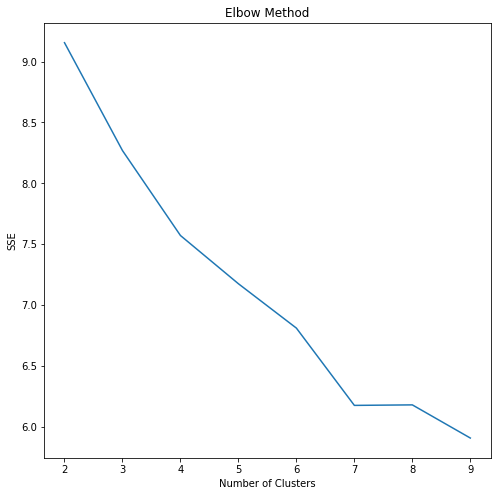

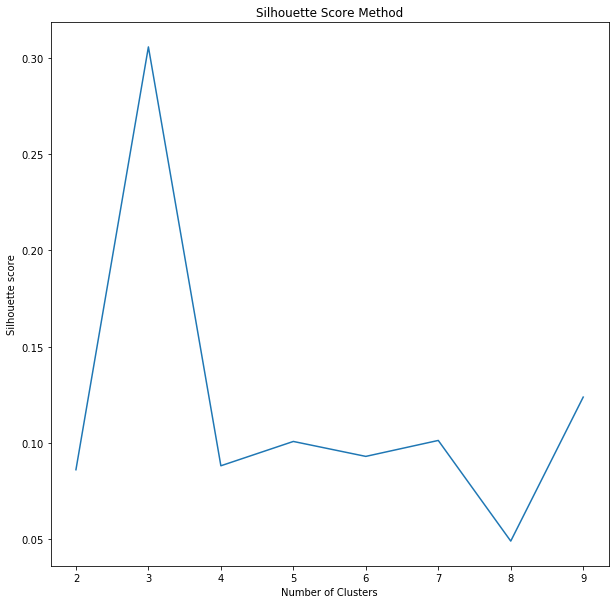

In [6]:
# Plot Elbow method graph
plt.figure(figsize=(8,8))
plt.plot(list(sse.keys()),list(sse.values()))
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(2, 10))
plt.ylabel("SSE")

# plot Silhouette score graph
plt.figure(figsize=(10,10))
plt.plot(list(slc.keys()),list(slc.values()))
plt.title("Silhouette Score Method")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(2, 10))
plt.ylabel("Silhouette score")

plt.show()

In [7]:
# check the optimum value of k
optimum_k = np.argmax(list(slc.values()))+2
optimum_k

3

Comparing both Silhouette score and Elbow method graphs, we can arrive at a conclusion that k=3 would be the optimum number of clusters. So lets fit the data once again.

In [8]:
# run k-means clustering with optimum number of cluster values
kmeans = KMeans(n_clusters=optimum_k,init="k-means++",random_state=0).fit(aucklandData)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [9]:
# read the sorted venue dataframe
aucklandVenuesSorted = pd.DataFrame(pd.read_csv("aucklandVenuesSorted",index_col=0))
aucklandVenuesSorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albany,Café,Bar,Sporting Goods Shop,Fast Food Restaurant,Department Store
1,Auckland Central,Café,Hotel,Bar,Park,Coffee Shop
2,Avondale,Café,Chinese Restaurant,Market,Mongolian Restaurant,Neighborhood
3,Beach Haven,Park,Pier,Trail,Chinese Restaurant,Farmers Market
4,Beachlands,Trail,Coffee Shop,Resort,Tennis Court,Eastern European Restaurant


In [10]:
# combine the dataframes with cluster labels
aucklandVenuesSorted.insert(0,"Cluster Labels",kmeans.labels_)

aucklandMerged = pd.DataFrame(pd.read_csv("auckland_datalatlong",index_col=0))

aucklandMerged = aucklandMerged.join(aucklandVenuesSorted.set_index('Suburb'),on='Suburb',how='inner')
aucklandMerged['Cluster Labels'] = aucklandMerged['Cluster Labels'].astype(int)
aucklandMerged.head()

,Area,Suburb,Average sale price,Average rent per week,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Auckland Central,Auckland Central,987500,1055,-36.848399,174.764388,0,Café,Hotel,Bar,Park,Coffee Shop
1,Central,Avondale,855105,554,-36.890448,174.687017,0,Café,Chinese Restaurant,Market,Mongolian Restaurant,Neighborhood
2,Central,Blockhouse Bay,930663,563,-36.928200,174.700190,0,Park,Café,Chinese Restaurant,Neighborhood,Mediterranean Restaurant
3,Central,Epsom,1601250,773,-36.888454,174.772938,0,Café,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Tennis Court
4,Central,Freemans Bay,1702167,881,-36.852879,174.750353,0,Café,Japanese Restaurant,Restaurant,Steakhouse,Italian Restaurant


#### Visualize the clusters

In [16]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
# location.latitude,location.longitude retrieved from earlier section of the notebook
auckland_map = folium.Map(location=[location.latitude,location.longitude],zoom_start=9)
# set color scheme for the clusters
x = np.arange(optimum_k)
ys = [i + x + (i*x)**2 for i in range(optimum_k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat,lng,suburb,cluster in zip(aucklandMerged['Latitude'],aucklandMerged['Longitude'],aucklandMerged['Suburb'],aucklandMerged['Cluster Labels']):
    label = folium.Popup(str(suburb) + " Cluster " + str(cluster),parse_html=True)
    folium.CircleMarker(
         [lat,lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7
    ).add_to(auckland_map)
auckland_map

#### Examine the clusters

In [57]:
cluster0 = aucklandMerged.loc[aucklandMerged['Cluster Labels']== 0]
cluster0

,Area,Suburb,Average sale price,Average rent per week,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Auckland Central,Auckland Central,987500,1055,-36.848399,174.764388,0,Café,Hotel,Bar,Park,Coffee Shop
1,Central,Avondale,855105,554,-36.890448,174.687017,0,Café,Chinese Restaurant,Market,Mongolian Restaurant,Neighborhood
2,Central,Blockhouse Bay,930663,563,-36.928200,174.700190,0,Park,Café,Chinese Restaurant,Neighborhood,Mediterranean Restaurant
3,Central,Epsom,1601250,773,-36.888454,174.772938,0,Café,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Tennis Court
4,Central,Freemans Bay,1702167,881,-36.852879,174.750353,0,Café,Japanese Restaurant,Restaurant,Steakhouse,Italian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
86,Western,Ranui,654769,490,-36.865026,174.601326,0,Zoo,Pizza Place,Train Station,Convenience Store,Deli / Bodega
87,Western,Sunnyvale,679786,522,-36.898465,174.636527,0,Flower Shop,Grocery Store,Climbing Gym,Farmers Market,Fruit & Vegetable Store
88,Western,Swanson,742000,546,-36.873784,174.569406,0,Business Service,Café,Golf Course,Train Station,Zoo
90,Western,Te Atatu South,773619,538,-36.869558,174.647331,0,Park,Stadium,Fast Food Restaurant,Breakfast Spot,Bakery


In [58]:
cluster1 = aucklandMerged.loc[aucklandMerged['Cluster Labels']== 1]
cluster1

,Area,Suburb,Average sale price,Average rent per week,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
65,Rodney,Warkworth,767071,541,-36.428190,174.640190,1,Café,Zoo,Food & Drink Shop,Flower Shop,Flea Market
67,Southern,Conifer Grove,677143,561,-36.946390,174.782401,1,Café,Park,Zoo,Ethiopian Restaurant,Flower Shop
78,Western,Glen Eden,712796,507,-36.913213,174.643600,1,Café,Indian Restaurant,Climbing Gym,Gym / Fitness Center,Park
79,Western,Glendene,746100,517,-36.890409,174.654240,1,Park,Bar,Café,Shopping Mall,Flower Shop
89,Western,Te Atatu Peninsula,850048,543,-36.840714,174.649985,1,Park,Grocery Store,Café,Go Kart Track,Zoo
91,Western,Titirangi,909294,581,-36.940495,174.647251,1,Café,Liquor Store,Restaurant,Trail,Pizza Place


In [59]:
cluster2 = aucklandMerged.loc[aucklandMerged['Cluster Labels']== 2]
cluster2

,Area,Suburb,Average sale price,Average rent per week,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
56,Pakuranga/ Howick,Mellons Bay,1121000,611,-36.87820,174.92019,2,Beach,Playground,Restaurant,Park,Zoo
61,Rodney,Orewa,944679,588,-36.56667,174.70000,2,Beach,Scenic Lookout,Zoo,Electronics Store,Flower Shop
77,Southern,Weymouth,600071,507,-37.04820,174.85019,2,Fast Food Restaurant,Beach,Zoo,Ethiopian Restaurant,Food


While examining the clusters, it is quite evident that, Cluster 0 comprises of Central Auckland suburbs
Whereas Cluster 1 has more Western suburbs and Cluster 2 has a mix of just 3 suburbs

Lets find the most common venue categories in each cluster

#### Cluster 0

In [74]:
print("There are {} unique first common venues in Cluster 0".format(len(cluster0['1st Most Common Venue'].unique())))
print("Average House Sale price in Cluster 0 is {}".format(cluster0['Average sale price'].mean()))
print("Average Rent/week in Cluster 0 is {}".format(cluster0['Average rent per week'].mean()))
cluster0['1st Most Common Venue'].value_counts()

There are 29 unique first common venues in Cluster 0
Average House Sale price in Cluster 0 is 1007300.4819277108
Average Rent/week in Cluster 0 is 620.0481927710844


Café                           38
Park                            7
Supermarket                     3
Trail                           3
Train Station                   3
Convenience Store               3
Harbor / Marina                 2
Hotel                           2
Fast Food Restaurant            2
Grocery Store                   1
Flower Shop                     1
Business Service                1
Fruit & Vegetable Store         1
Chinese Restaurant              1
Shopping Mall                   1
Boat or Ferry                   1
Department Store                1
Clothing Store                  1
Sandwich Place                  1
Beach                           1
Sporting Goods Shop             1
Burger Joint                    1
Pool                            1
Scenic Lookout                  1
Italian Restaurant              1
Eastern European Restaurant     1
Pizza Place                     1
Vietnamese Restaurant           1
Zoo                             1
Name: 1st Most

#### Cluster 1

In [76]:
print("There are {} unique first common venues in Cluster 1".format(len(cluster1['1st Most Common Venue'].unique())))
print("Average House Sale price in Cluster 1 is {}".format(cluster1['Average sale price'].mean()))
print("Average Rent/week in Cluster 1 is {}".format(cluster1['Average rent per week'].mean()))
cluster1['1st Most Common Venue'].value_counts()

There are 2 unique first common venues in Cluster 1
Average House Sale price in Cluster 1 is 777075.3333333334
Average Rent/week in Cluster 1 is 541.6666666666666


Café    4
Park    2
Name: 1st Most Common Venue, dtype: int64

#### Cluster 2

In [77]:
print("There are {} unique first common venues in Cluster 2".format(len(cluster2['1st Most Common Venue'].unique())))
print("Average House Sale price in Cluster 2 is {}".format(cluster2['Average sale price'].mean()))
print("Average Rent/week in Cluster 2 is {}".format(cluster2['Average rent per week'].mean()))
cluster2['1st Most Common Venue'].value_counts()

There are 2 unique first common venues in Cluster 2
Average House Sale price in Cluster 2 is 888583.3333333334
Average Rent/week in Cluster 2 is 568.6666666666666


Beach                   2
Fast Food Restaurant    1
Name: 1st Most Common Venue, dtype: int64

#### Cluster 0 has a variety of shops, but has more cafes and parks. Also, the average rent/week is NZD 620 and Sale price is NZD 1,007,300
#### Cluster 1 has 4 cafes and parks as the most common venue. Also, the average rent/week is NZD 541 and Sale price is NZD 777,075
#### Cluster 2 has beach and fast food restaurant. Also, the average rent/week is NZD 568 and Sale price is NZD 888,583